In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=549e51d9ac6ce484f407a31dea09ab58


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | nguiu
City not found. Skipping...
Processing Record 3 of Set 1 | solnechnyy
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | djougou
Processing Record 6 of Set 1 | dalhousie
Processing Record 7 of Set 1 | yumen
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bojnurd
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | dwarka
Processing Record 15 of Set 1 | kathu
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | berdigestyakh
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | kieta
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 

Processing Record 38 of Set 4 | san francisco
Processing Record 39 of Set 4 | lufkin
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | nizhnevartovsk
Processing Record 42 of Set 4 | khorramshahr
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | puerto ayora
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | pundaguitan
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | lata
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 3 of Set 5 | copiapo
Processing Record 4 of Set 5 | nantucket
Processing Record 5 of Set 5 | bluff
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | paranhos
Processing Record 8 of Set 5 | ulladulla
Processing Record 9 of Set 5 | hambantota
Processing Reco

Processing Record 28 of Set 8 | evensk
Processing Record 29 of Set 8 | severo-yeniseyskiy
Processing Record 30 of Set 8 | comodoro rivadavia
Processing Record 31 of Set 8 | launceston
Processing Record 32 of Set 8 | healdsburg
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | kurumkan
Processing Record 35 of Set 8 | chagoda
Processing Record 36 of Set 8 | kropotkin
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 39 of Set 8 | shibarghan
City not found. Skipping...
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | winnemucca
Processing Record 42 of Set 8 | gigmoto
Processing Record 43 of Set 8 | chifeng
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | holland
Processing Record 46 of Set 8 | birin
Processing Record 47 of Set 8 | ukiah
Processing Record 48 of Set 8 | paamiut
Processing Record 49 of Set 8 | sayyan
Processing Record 

Processing Record 16 of Set 12 | isangel
Processing Record 17 of Set 12 | pasni
Processing Record 18 of Set 12 | darhan
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | rakai
Processing Record 21 of Set 12 | sarishabari
Processing Record 22 of Set 12 | luquillo
Processing Record 23 of Set 12 | nkhata bay
Processing Record 24 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 12 | gubkinskiy
Processing Record 26 of Set 12 | morlaix
Processing Record 27 of Set 12 | kovdor
Processing Record 28 of Set 12 | hovd
Processing Record 29 of Set 12 | manfredonia
Processing Record 30 of Set 12 | aflu
City not found. Skipping...
Processing Record 31 of Set 12 | shetpe
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | billings
Processing Record 34 of Set 12 | sambava
Processing Record 35 of Set 12 | sioux lookout
Processing Record 36 of Set 12 | namie
Processing Record 37 of Set 12 | san patricio
Processing Record 38 of Set 12 | flinde

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,62,40,23.02,CL,2022-04-20 19:33:44
1,Solnechnyy,50.7214,136.6319,32.47,95,100,6.62,RU,2022-04-20 19:33:45
2,Djougou,9.7085,1.6660,80.80,60,100,1.59,BJ,2022-04-20 19:33:45
3,Dalhousie,32.5333,75.9833,55.83,47,4,10.18,IN,2022-04-20 19:33:45
4,Yumen,40.2833,97.2000,49.42,15,100,8.23,CN,2022-04-20 19:33:46
5,Thompson,55.7435,-97.8558,32.16,55,75,16.11,CA,2022-04-20 19:33:46
6,Victoria,22.2855,114.1577,73.18,84,92,5.01,HK,2022-04-20 19:33:14
7,Hermanus,-34.4187,19.2345,63.36,83,100,2.06,ZA,2022-04-20 19:33:46
8,Bojnurd,37.4747,57.3290,55.35,67,0,2.30,IR,2022-04-20 19:33:47
9,Bredasdorp,-34.5322,20.0403,65.28,58,100,3.13,ZA,2022-04-20 19:33:47


In [11]:
#Reorder the columns in new order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign data frame the new column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-04-20 19:33:44,-53.1500,-70.9167,51.91,62,40,23.02
1,Solnechnyy,RU,2022-04-20 19:33:45,50.7214,136.6319,32.47,95,100,6.62
2,Djougou,BJ,2022-04-20 19:33:45,9.7085,1.6660,80.80,60,100,1.59
3,Dalhousie,IN,2022-04-20 19:33:45,32.5333,75.9833,55.83,47,4,10.18
4,Yumen,CN,2022-04-20 19:33:46,40.2833,97.2000,49.42,15,100,8.23
...,...,...,...,...,...,...,...,...,...
561,Zhaoyang,CN,2022-04-20 19:49:45,42.6820,126.0305,52.52,53,4,13.71
562,Fortuna,US,2022-04-20 19:49:45,40.5982,-124.1573,55.98,93,75,17.27
563,Ugoofaaru,MV,2022-04-20 19:49:46,5.6667,73.0000,84.76,73,54,9.33
564,Sept-Iles,CA,2022-04-20 19:49:46,50.2001,-66.3821,41.52,84,100,12.66


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

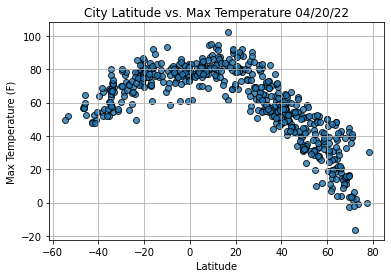

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

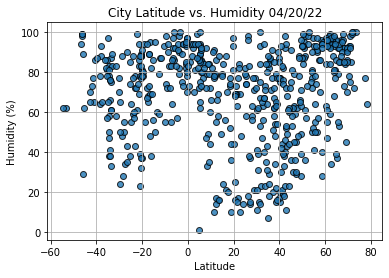

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

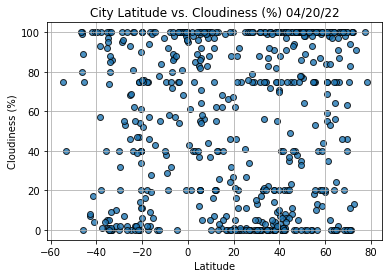

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

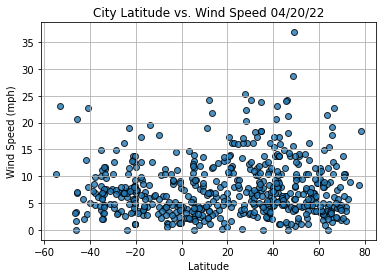

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()